<h2 style="color:red" align="center">Machine Learning With Python: Linear Regression With two Variable</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


pandas: A library for data manipulation and analysis. It provides data structures for efficiently storing and manipulating large datasets, as well as tools for reading and writing data from/to various file formats.
Documentation: https://pandas.pydata.org/docs/

numpy: A library for numerical computations in Python. It provides a powerful array data structure and a collection of functions for performing mathematical operations on arrays.
Documentation: https://numpy.org/doc/stable/

scikit-learn (or sklearn): A library for machine learning in Python. It provides a range of supervised and unsupervised learning algorithms, as well as tools for preprocessing data, model selection, and evaluation.
Documentation: https://scikit-learn.org/stable/documentation.html

matplotlib: A library for creating static, animated, and interactive visualizations in Python. It provides a range of tools for creating plots, charts, histograms, and other types of visualizations.
Documentation: https://matplotlib.org/stable/

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


In [2]:
# Load the data
df = pd.read_csv('homeprices_multivariable.csv')
df

,area,bedrooms,price
0,2600,3.0,550000
1,3000,4.0,565000
2,3200,NaN,610000
3,3600,3.0,595000
4,4000,5.0,760000
5,4100,6.0,810000


In [3]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,price
0,2600,3.0,550000
1,3000,4.0,565000
2,3200,4.0,610000
3,3600,3.0,595000
4,4000,5.0,760000
5,4100,6.0,810000


This code block loads the data from a CSV file named homeprices.csv and stores it in a pandas DataFrame called df.

The pd.read_csv() function is used to read the CSV file and create a DataFrame. The argument 'homeprices.csv' specifies the path and filename of the CSV file to read. If the CSV file is not in the same directory as the Jupyter Notebook, you need to provide the full path to the file.

The second line df is a shorthand for displaying the entire DataFrame in the output cell. This will show the data that was loaded from the CSV file.

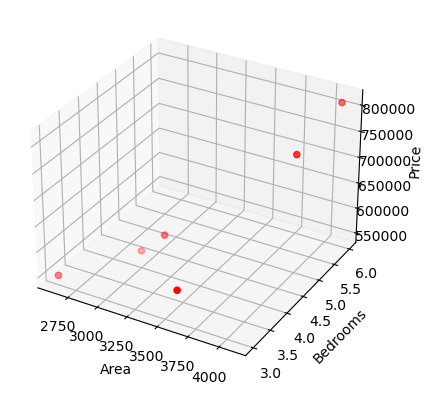

In [4]:
from mpl_toolkits.mplot3d import Axes3D
 

# Extract the features and target variable
X = df[['area', 'bedrooms']]
y = df['price']

# Create a linear regression object
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['area'], X['bedrooms'], y, c='r', marker='o')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price') 

plt.show()


This code block plots a scatter plot using matplotlib library to visualize the relationship between the area, bedrooms and price columns of the DataFrame df.

%matplotlib inline is a Jupyter Notebook magic command that allows the plot to be displayed inline in the notebook.

plt.xlabel('area') and plt.ylabel('price') are used to set the labels for the x and y-axis of the plot, respectively.

plt.scatter(df.area,df.price,color='red',marker='+') is used to plot the data as a scatter plot. The df.area and df.price are used as the x and y values respectively. The color argument is set to 'red' to make the plot points red in color and marker argument is set to '+' to make the plot points visible as crosses.

In [5]:
# Extract the features and target variable
X = df[['area', 'bedrooms']]
y = df['price']


This code block extracts the feature and target variables from the df DataFrame.

X is created as a DataFrame containing the area column from df using df[['area']] syntax. This is done to ensure that X is a DataFrame and not a Series, which is required by many machine learning algorithms.

y is created as a Series containing the price column from df using df['price']. The target variable is often represented as a one-dimensional array or a Series in machine learning.






In [6]:

# Create a linear regression object
reg = linear_model.LinearRegression()
reg.fit(X, y)


LinearRegression()

This code block creates a linear regression object and fits the model to the data.

linear_model.LinearRegression() creates a linear regression object. This object will be used to perform linear regression on the data.

reg.fit(X, y) is used to fit the linear regression model to the data. X is the feature variable (a DataFrame containing the area column) and y is the target variable (a Series containing the price column). The fit() method calculates the coefficients of the linear regression line that best fits the data. After the fit is completed, reg contains the linear regression model with the calculated coefficients.

In [7]:
print(f"price of a home with area = 3300 sqr and 3 bed rooms ft** = {reg.predict([[3000, 3]])}")

price of a home with area = 3300 sqr and 3 bed rooms ft** = [550356.91109669]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


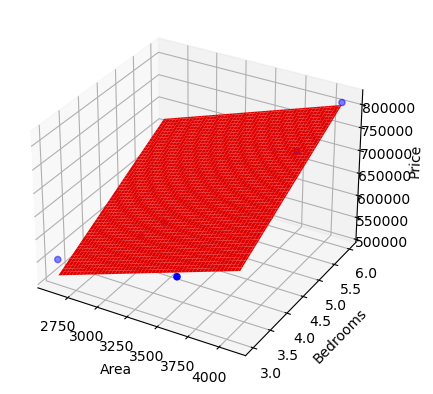

In [8]:
# Plot the data points and the regression plane for the actual prices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['area'], X['bedrooms'], y, c='blue', marker='o')
x_surf, y_surf = np.meshgrid(np.linspace(X['area'].min(), X['area'].max(), 100), 
                             np.linspace(X['bedrooms'].min(), X['bedrooms'].max(), 100))
z_surf = reg.intercept_ + reg.coef_[0]*x_surf + reg.coef_[1]*y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red')
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()

This code is creating a 3D scatter plot of the input features ('area' and 'bedrooms') and the output variable ('price') using matplotlib's scatter() method. It then creates a meshgrid of 100 evenly spaced points along the 'area' and 'bedrooms' dimensions using numpy's linspace() method. A plane for the linear regression model is then created using the formula z_surf = intercept + coef[0]*x_surf + coef[1]*y_surf, where intercept and coef are the parameters learned by the regression model, and x_surf and y_surf are the meshgrids. Finally, the plane is plotted on the same 3D plot using matplotlib's plot_surface() method. The axis labels are also set using the set_xlabel(), set_ylabel(), and set_zlabel() methods.

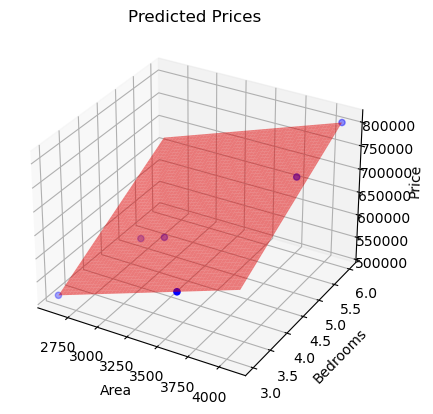

In [9]:
# Plot the data points and the regression plane for the predicted prices
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['area'], X['bedrooms'], reg.predict(X), color='blue')
x_surf, y_surf = np.meshgrid(np.linspace(X['area'].min(), X['area'].max(), 100), 
                             np.linspace(X['bedrooms'].min(), X['bedrooms'].max(), 100))
z_surf = reg.predict(pd.DataFrame({'area': x_surf.ravel(), 'bedrooms': y_surf.ravel()})).reshape(x_surf.shape)
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)
ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.title('Predicted Prices')
plt.show()

This code is plotting a 3D scatter plot for the predicted prices based on the linear regression model we trained earlier.

First, we create a figure and an axis object using fig = plt.figure() and ax = fig.add_subplot(111, projection='3d'), respectively. We then scatter plot the input data points (i.e., area and bedrooms) against the predicted prices using ax.scatter(X['area'], X['bedrooms'], reg.predict(X), color='blue'). Here, X['area'] and X['bedrooms'] represent the two features of the input data, and reg.predict(X) is used to get the predicted prices based on the model we trained earlier.

Next, we create a mesh grid using np.meshgrid function. This mesh grid is then used to create a surface plot for the predicted prices using ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5). Here, x_surf and y_surf are the mesh grids created earlier, and z_surf is the predicted prices for all the combinations of x_surf and y_surf values.

Finally, we set the labels for the x, y, and z-axis using ax.set_xlabel('Area'), ax.set_ylabel('Bedrooms'), and ax.set_zlabel('Price'), respectively, and set the title of the plot using plt.title('Predicted Prices'). We then display the plot using plt.show().

In [10]:
# read the csv file into a pandas dataframe
df = pd.read_csv('trainingTestingDataset.csv')
df.drop(['FID','RCLS_GEOL'],axis='columns',inplace=True)
df.head()
inputs = df.drop('label',axis='columns')
target = df.label

,RCL_D2FLT,RCLS_CHM_C,RCLS_CHM_D,RCLS_COM_C,RCLS_COM_D,RCLS_CTCT_,RCLS_D1ANT,RCLS_D1FLT,RCLS_D1XD2,RCLS_D2_X,RCLS_D2ANT,RCLS_D2FLT,RCLS_DE_D2,RCLS_DELFT,RCLS_DOL_D,RCLS_GRN,RCLS_STR_D,label
0,2,2,2,3,2,2,1,1,1,2,2,2,2,2,2,3,2,0
1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,2,1,2,2,1,1,2,2,2,0,0,0,0
3,2,2,1,3,1,2,1,2,1,2,2,2,2,2,1,3,1,0
4,2,2,1,3,1,2,1,2,2,2,1,2,2,2,0,0,0,0
